## Generates Fig. S12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.cm as cm

# special imports for scaling maps!
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'


from soursop.sstrajectory import SSTrajectory

In [3]:
cmap_ntd_rbd_full = {}

RNA_lengths = [10,15,20,25,30,35,40]
for r in RNA_lengths:
    cmap_ntd_rbd_full[r] = np.loadtxt(f'../data/rna_protein_contacts/NTD_RBD/longer_RNAs_thresh_14/{r}mer_inter_residue_contact_map_thresh_14.csv')




173

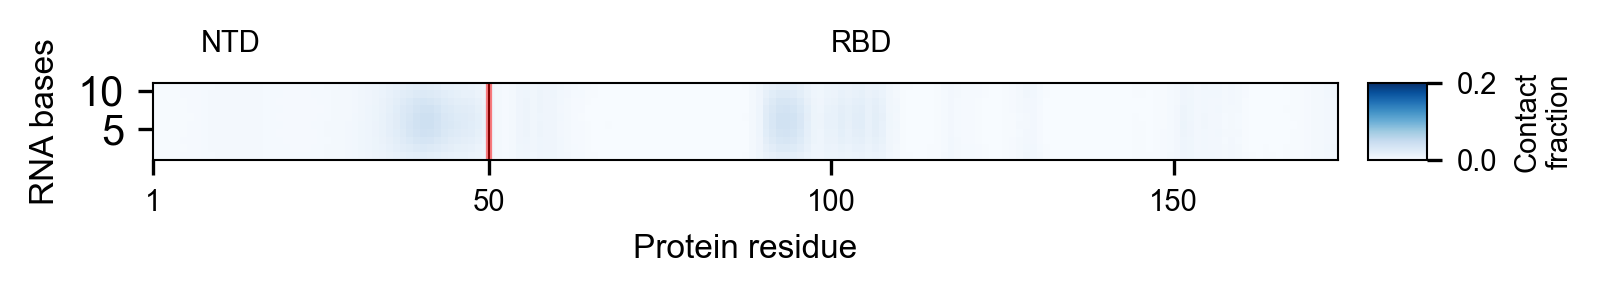

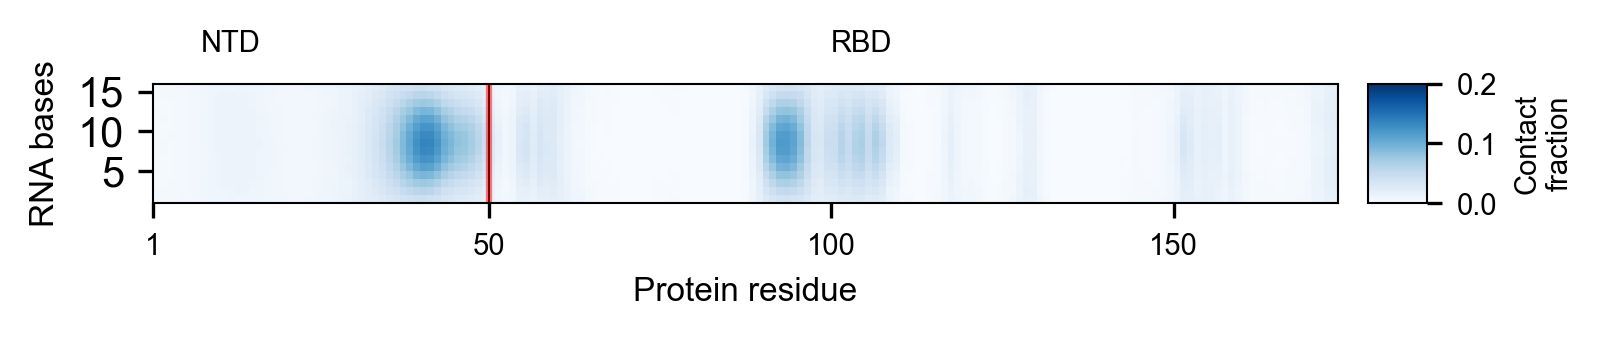

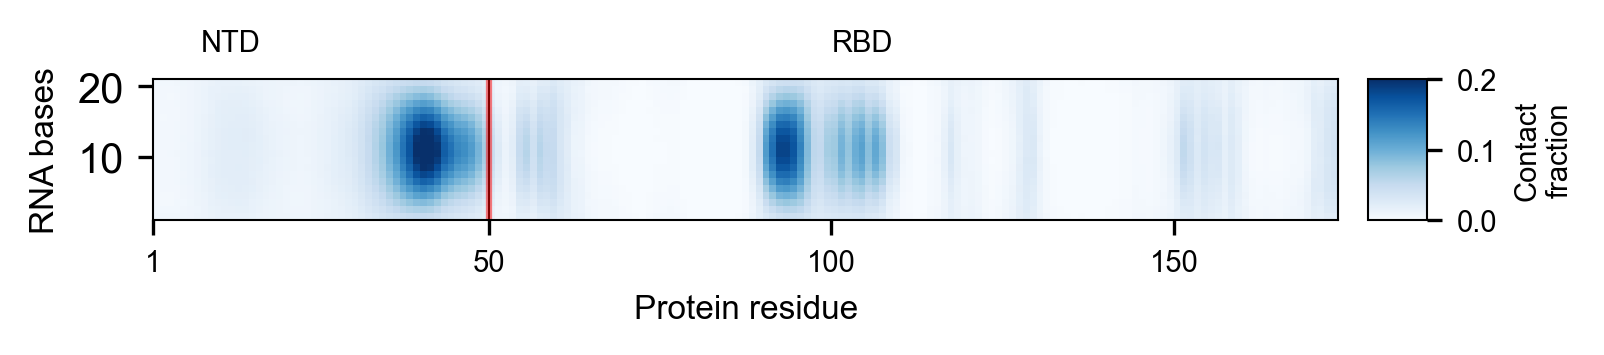

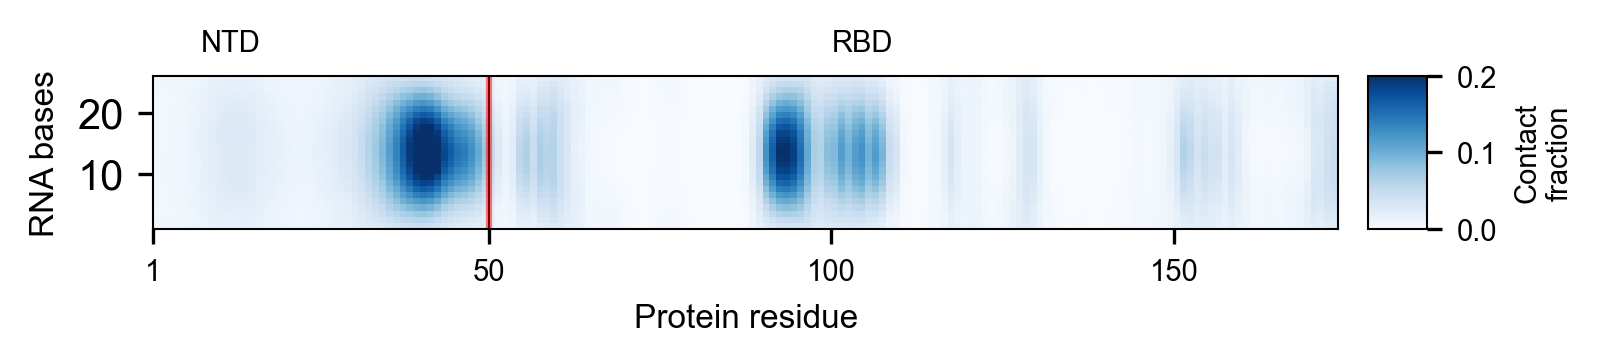

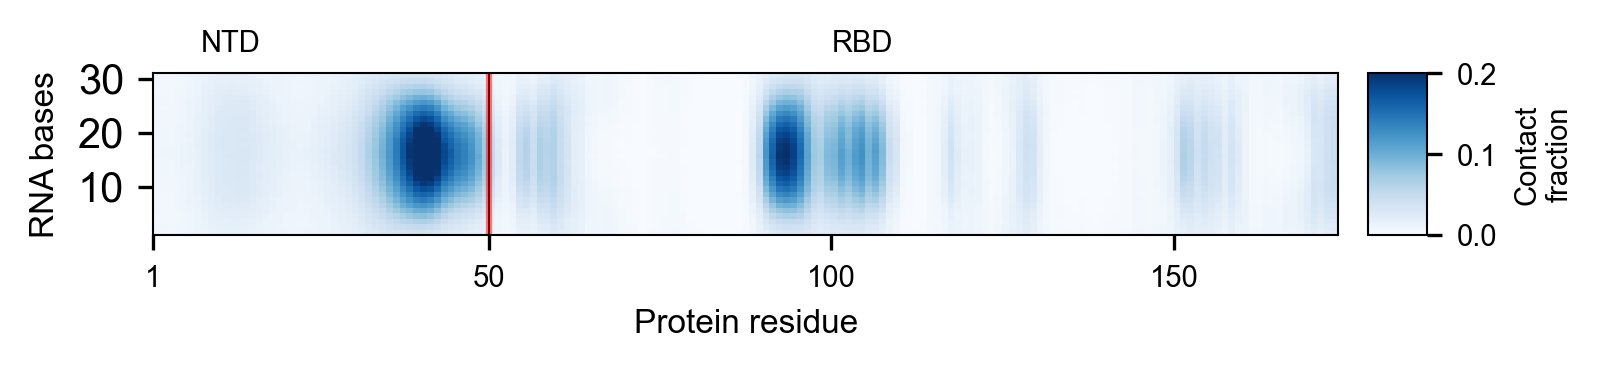

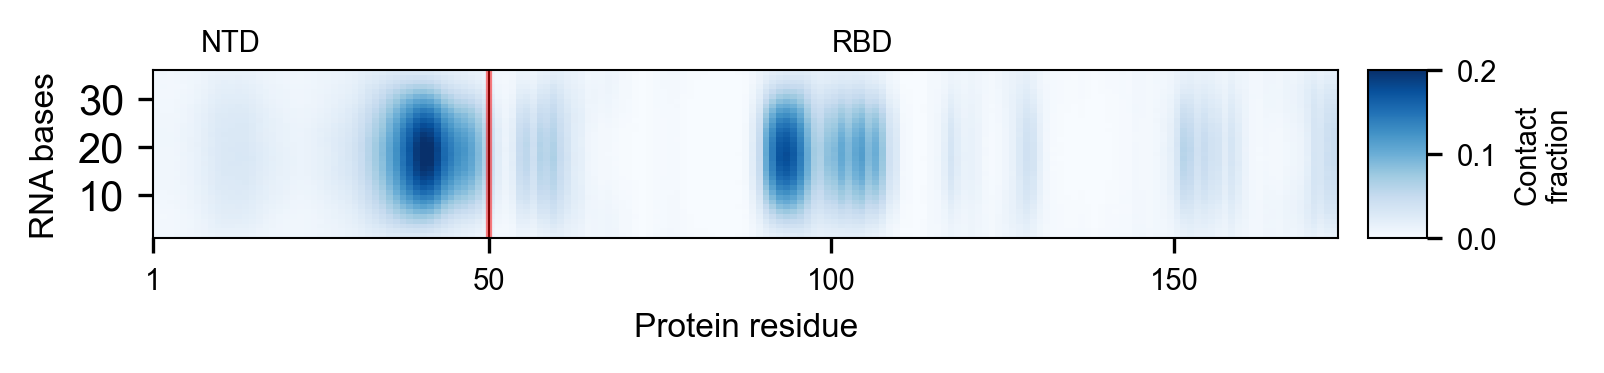

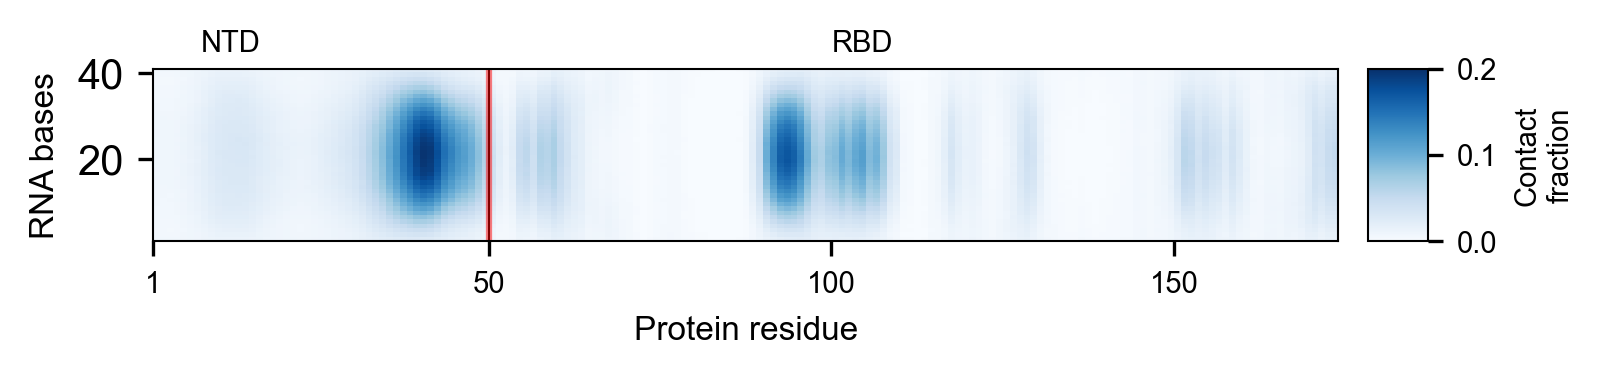

In [52]:

for r in RNA_lengths:

    fig = figure(num=None, figsize=(5.5, 1.4), dpi=150, facecolor='w', edgecolor='k')
    ax_list = fig.axes
    
    n_protein_res = cmap_ntd_rbd_full[r].shape[0]
    n_RNA_res = cmap_ntd_rbd_full[r].shape[1]
    local_cmap = cmap_ntd_rbd_full[r]

    # set the residue numbers to match real-world protein/RNA numbering. Note here
    # we're starting at 1, but if you were looking at other proteins with subdomains that
    # don't start at 1 this is really useful!!
    start_protein = 1
    end_protein = 1 + n_protein_res

    start_rna = 1
    end_rna = 1 + n_RNA_res


    # note vmin and vmax here define the dynamic range of the figure
    im = plt.imshow(local_cmap.transpose(),
                    origin='lower', 
                    extent=[start_protein, end_protein, start_rna, end_rna],
                    vmin=0, vmax=0.2, cmap = 'Blues',aspect='auto', interpolation=None)


    plt.xlabel('Protein residue', fontsize=8)
    plt.ylabel('RNA bases', fontsize=8)

    ax = plt.gca()
    ax.autoscale(False)

    # can draw on a line dividing the NTD and RBD 
    NTD_RBD_junction=50
    plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,n_RNA_res+1], '-k',  alpha=1,linewidth=0.5)
    plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,n_RNA_res+1], '-r',  alpha=0.5,)

    # can label the two halves (15 and 100 [x position of text] were chosen because 
    # they looked good)
    plt.text(8, n_RNA_res+5, 'NTD', fontsize=7)
    plt.text(100, n_RNA_res+5, 'RBD', fontsize=7)

    # draw color bar seperately so it matches the dimensions of the imshow figure

    #plt.xticks(np.arange(start_protein, end_protein, 25.0))
    plt.xticks([1,50,100,150], fontsize=7)
    #plt.yticks([1,10], fontsize=7)

    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    #cb = plt.colorbar(cax=cax, ticks=[0, .05])
    cb = plt.colorbar(cax=cax)
    cb.set_label('Contact\nfraction', fontsize=7)
    cb.ax.tick_params(labelsize=7)




    # include this to stop matplotlib being dumb and chopping off axes info...
    plt.tight_layout()

    plt.savefig(f"figures/RNA_contacts_all_RNAs/Contact_NTDRBD_rU{r}_14A.pdf", dpi = 350, bbox_inches='tight')
    



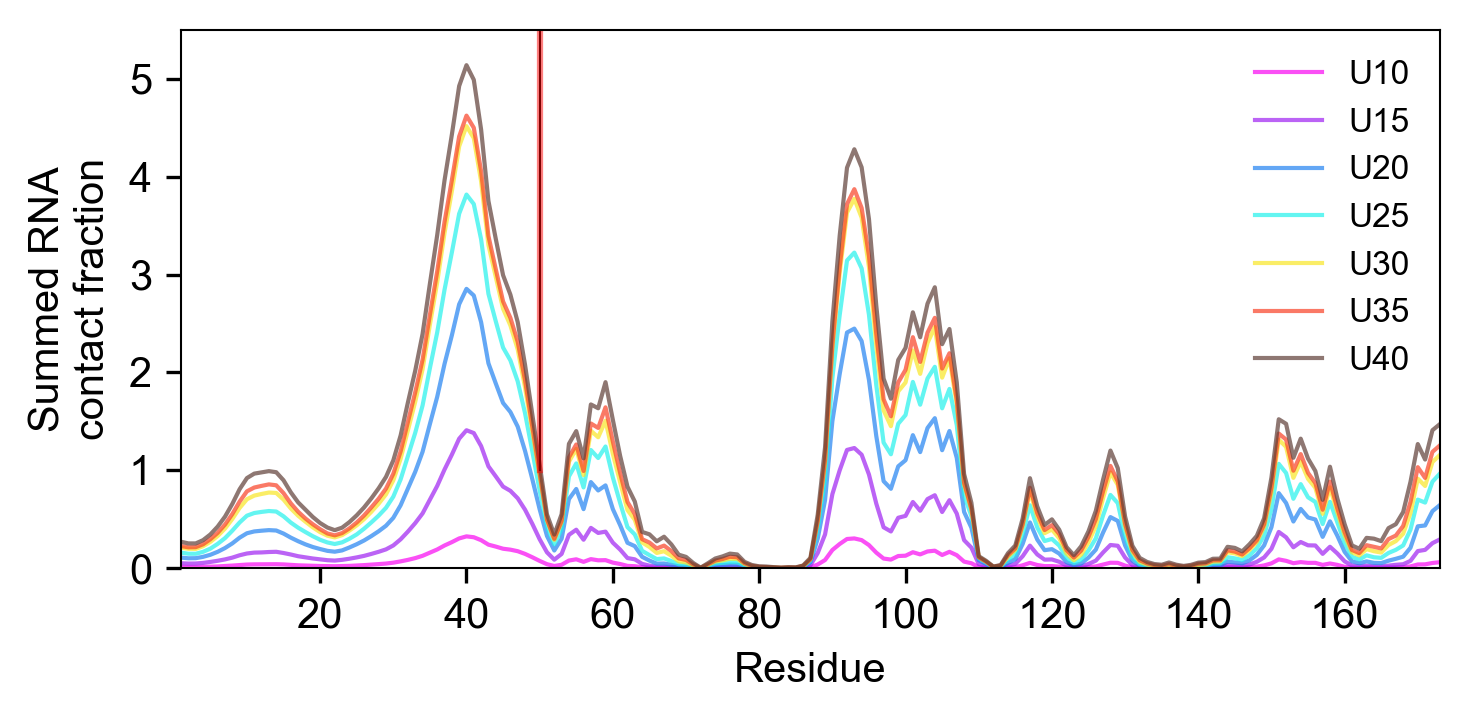

In [54]:
fig = figure(num=None, figsize=(5, 2.5), dpi=150, facecolor='w', edgecolor='k')
indices = np.arange(1,n_protein_res+1)

all_colors = ['#F806F2','#9F21F1', '#2182F1', '#21F1EC', '#F9E625', '#F94125', '#5E3E37']

for i, r in enumerate(RNA_lengths):
    color = all_colors[i]
    
    n_RNA_res = cmap_ntd_rbd_full[r].shape[1]

    plt.plot(indices, np.sum(cmap_ntd_rbd_full[r].transpose(),0),linewidth=1, label=f'U{r}', color=color, alpha=0.7)
    
plt.yticks([0,1,2,3,4,5])
plt.xlim(indices[0], indices[-1])
NTD_RBD_junction=50
plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,6], '-k',  alpha=1,linewidth=0.5)
plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,6], '-r',  alpha=0.5,)
plt.ylim([0,5.5])
plt.ylabel('Summed RNA\ncontact fraction')
plt.legend(frameon=False, fontsize=8)
plt.xlabel('Residue')
plt.tight_layout()
plt.savefig(f"figures/RNA_contacts_all_RNAs/summary_14A.pdf", dpi = 350, bbox_inches='tight')


In [63]:
all_enhancement = {}

for i, r in enumerate(RNA_lengths):

    cmap_U_NTD_RBD = np.loadtxt(f'../data/rna_protein_contacts/NTD_RBD/longer_RNAs_thresh_14/{r}mer_inter_residue_contact_map_thresh_14.csv')
    cmap_U_RBD = np.loadtxt(f'../data/rna_protein_contacts/RBD/longer_RNAs_thresh_14/RBD_{r}mer_inter_residue_contact_map_thresh_14.csv')

    empty_ntd_U = np.zeros((49,r))
    cmap_U_RBD = np.vstack((empty_ntd_U, cmap_U_RBD))
    
    tmp = np.sum(cmap_U_NTD_RBD.transpose(),0)/n_nts - np.sum(cmap_U_RBD.transpose(),0)/n_nts
    
    all_enhancement[r] = tmp
    


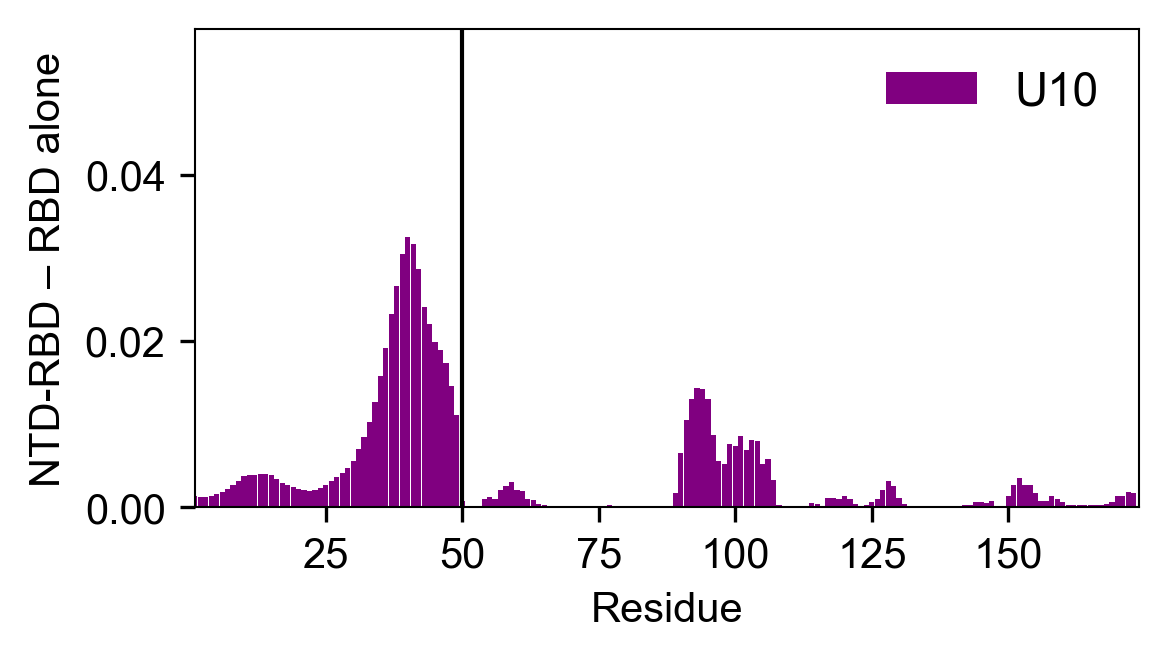

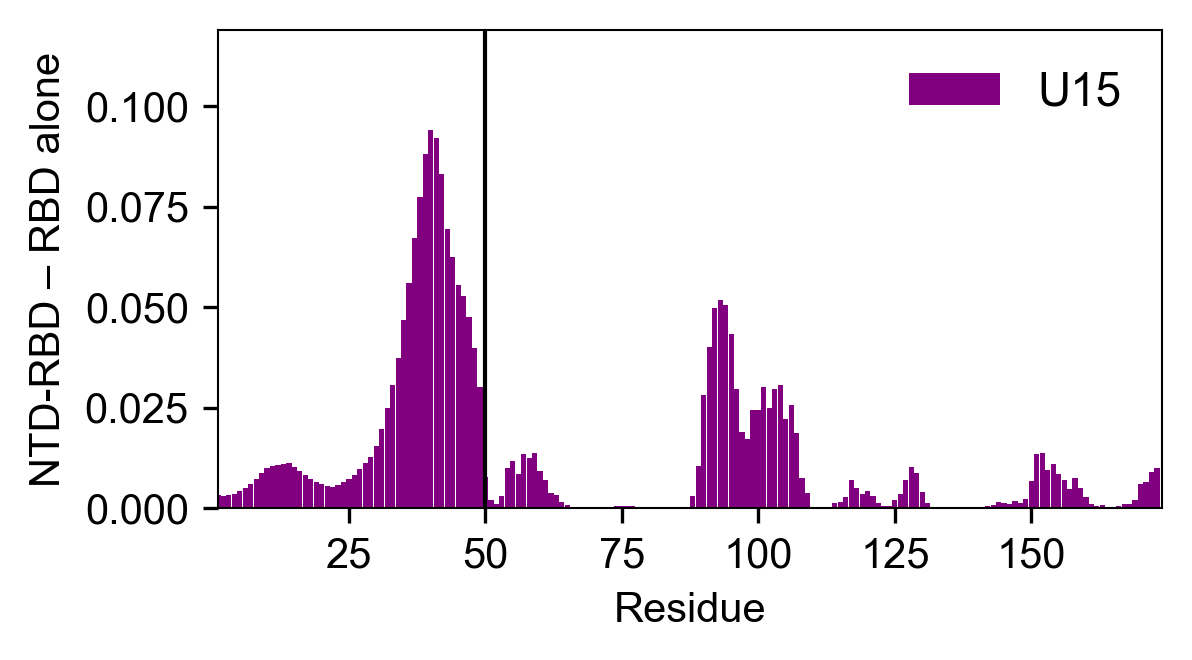

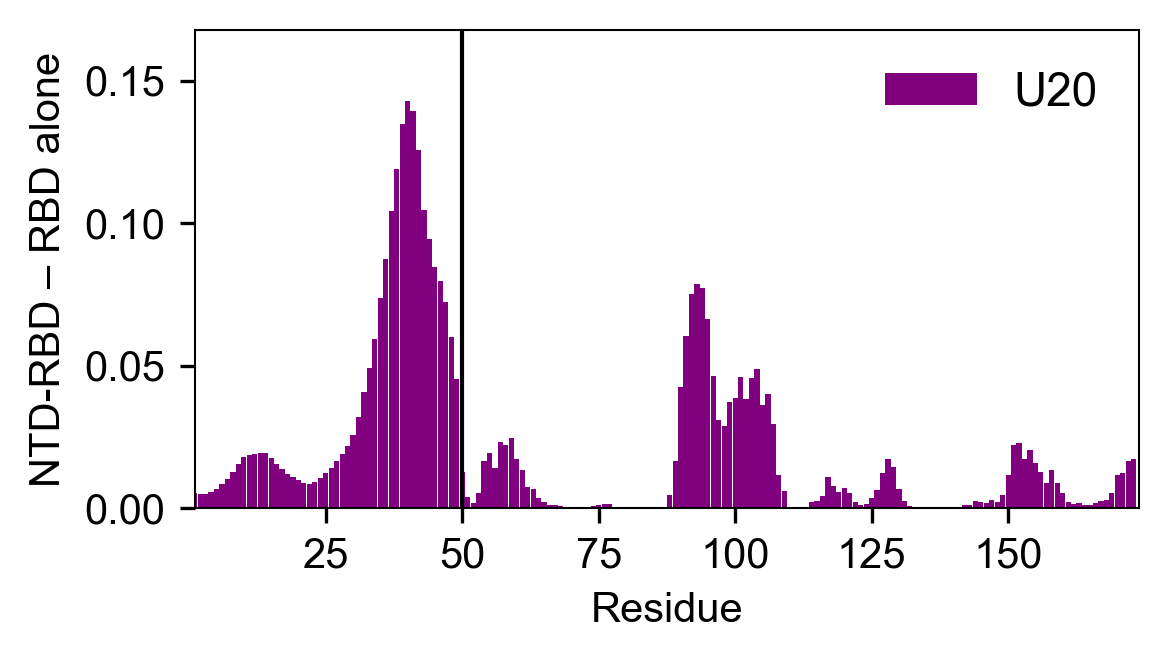

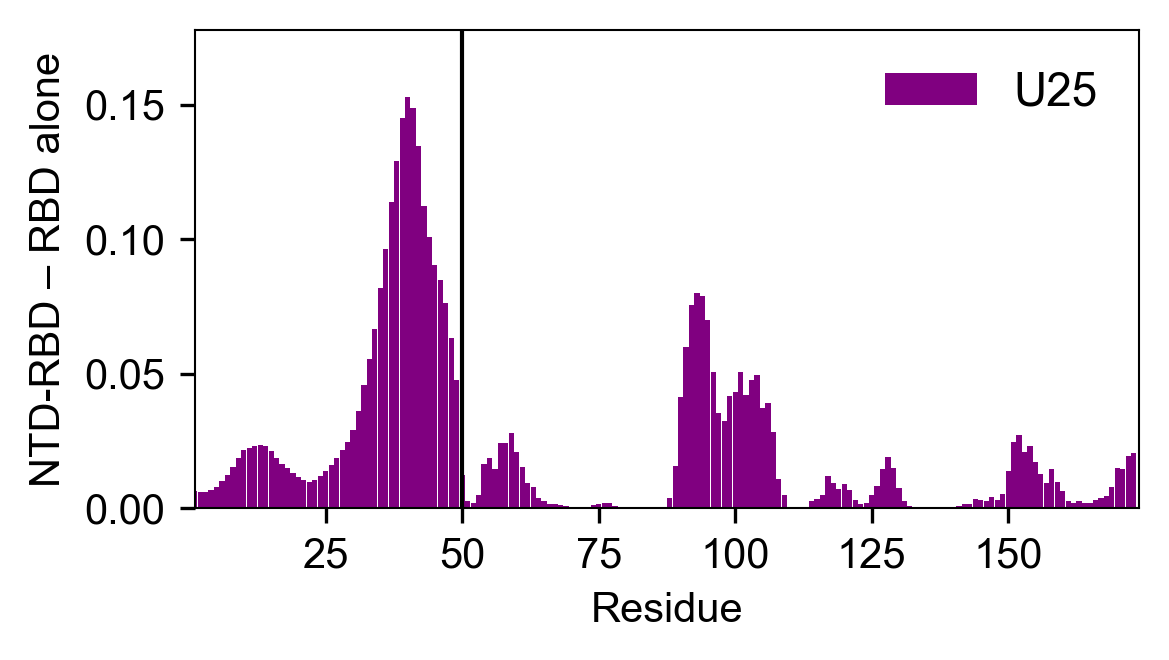

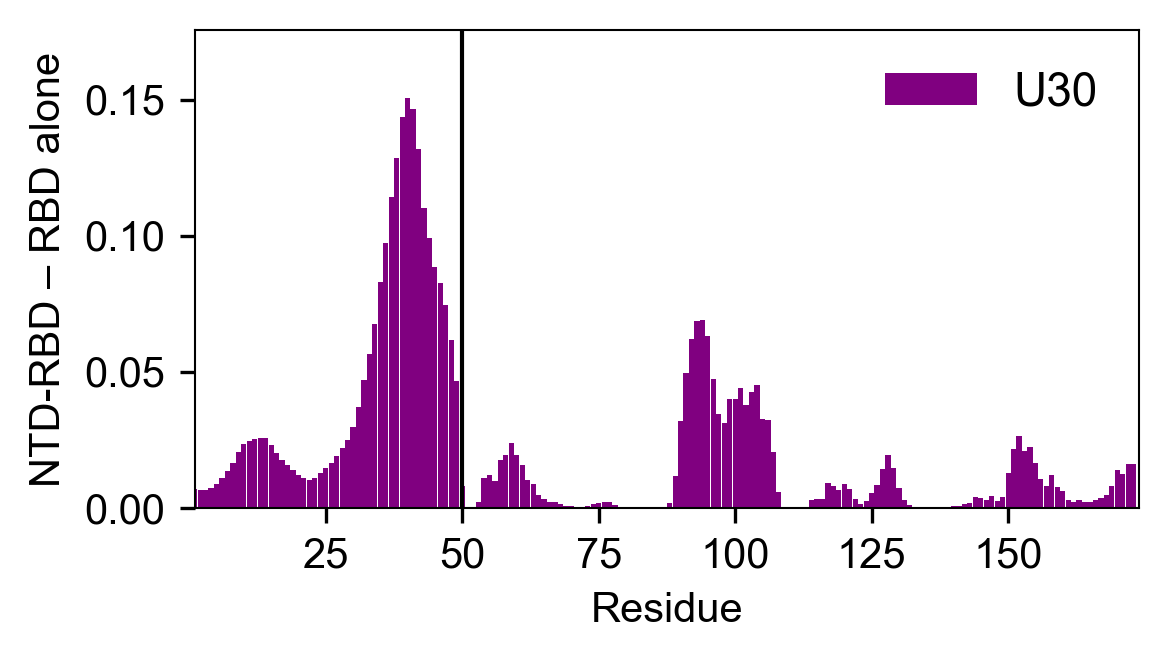

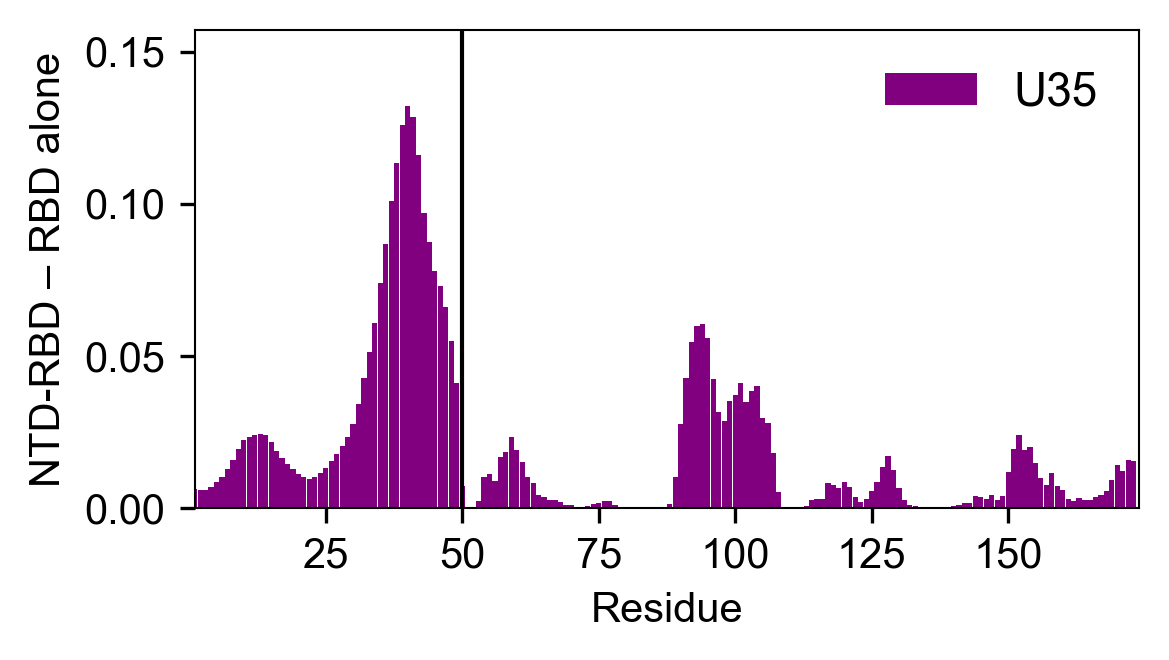

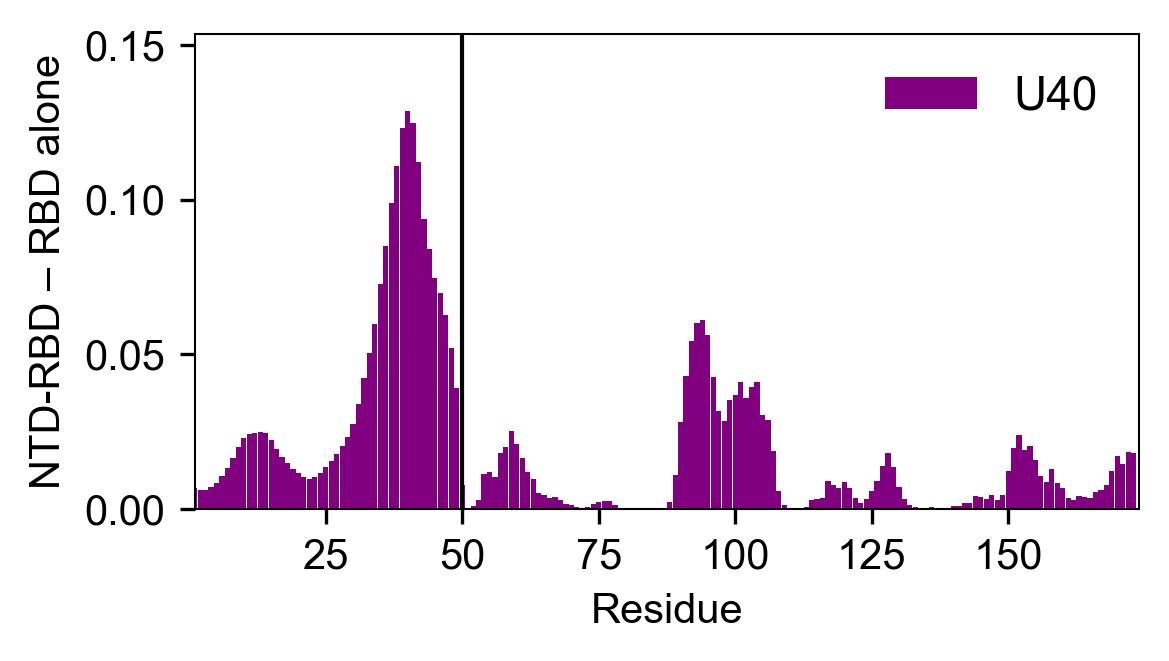

In [62]:


    n_nts = cmap_U_RBD.shape[1]



    fig = figure(num=None, figsize=(4, 2.3), dpi=150, facecolor='w', edgecolor='k')
    indices = np.arange(1,n_protein_res+1)


    enhancement = np.sum(cmap_U_NTD_RBD.transpose(),0)/n_nts - np.sum(cmap_U_RBD.transpose(),0)/n_nts

    max_enhance = np.max(enhancement)+0.025

    plt.bar(indices, enhancement,color='purple', width=0.95, label=f'U{r}')
    #plt.plot(indices, , color='purple', linewidth=1, label='NTD-RBD')
    #plt.bar(nmr_csp.transpose()[0], nmr_csp.transpose()[1], width=1, color='k')
    plt.plot([NTD_RBD_junction,NTD_RBD_junction],[0,max_enhance], color='k',lw=1)
    #plt.plot([indices[0], indices[-1]],[1,1],'-k',linewidth=2)

    plt.xlabel('Residue',fontsize=10)
    plt.ylabel('NTD-RBD – RBD alone',fontsize=10)
    plt.legend(frameon=False,fontsize=11)


    plt.ylim([0,max_enhance])
    #plt.yticks([-0.02,0,0.02],[0.02,0,0.02])
    plt.xlim([1,n_protein_res+1])
    plt.tight_layout()


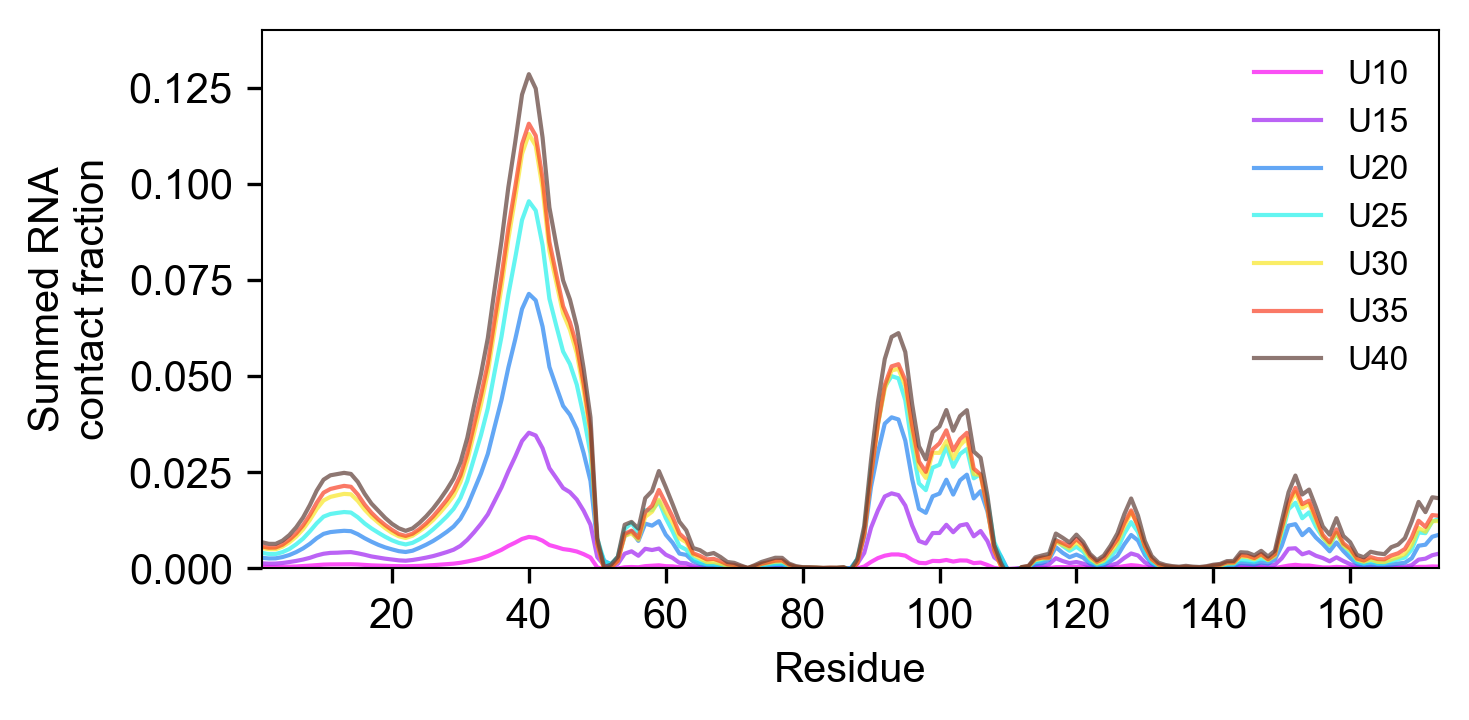

In [69]:
fig = figure(num=None, figsize=(5, 2.5), dpi=150, facecolor='w', edgecolor='k')
indices = np.arange(1,n_protein_res+1)

all_colors = ['#F806F2','#9F21F1', '#2182F1', '#21F1EC', '#F9E625', '#F94125', '#5E3E37']

for i, r in enumerate(RNA_lengths):
    color = all_colors[i]
    
    enhancement = all_enhancement[r]

    plt.plot(indices, enhancement,linewidth=1, label=f'U{r}', color=color, alpha=0.7)
    
#plt.yticks([0,1,2,3,4,5])
plt.xlim(indices[0], indices[-1])
NTD_RBD_junction=50
#plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,6], '-k',  alpha=1,linewidth=0.5)
#plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,6], '-r',  alpha=0.5,)
plt.ylim([0, 0.14])
plt.ylabel('Summed RNA\ncontact fraction')
plt.legend(frameon=False, fontsize=8)
plt.xlabel('Residue')
plt.tight_layout()
plt.savefig(f"figures/RNA_contacts_all_RNAs/enhancement_summary_14A.pdf", dpi = 350, bbox_inches='tight')
